### Teilaufgabe 1
Arbeiten Sie das Tutorial [ Linear Regression ](https://mlu-explain.github.io/linear-regression/) durch. (Den Abschnitt "A Closed Form Solution" können Sie auslassen, da hier die Formel für die Multiple (d.h. Nicht-Einfache) Lineare Regression beschrieben wird -- diese Formel wird in der Vorlesung nicht besprochen.) Was bedeutet der Ausdruck "Residual"? Recherchieren Sie zusätzlich, was die Ausdrücke "Regressor" und "Regressand" bedeuten.

residuals, measure the distance between each observation and the predicted value for that observation

regressor: an independent variable; features that we use for prediction

regressand: dependent variable; the target we try to predict

### Teilaufgabe 2
Wir möchten die Regressionsgerade zwischen `x=df["s1"]` und `y=df["s2"]` bestimmen, wenn `df` der sklearn Diabetes-Datensatz ist.

Implementieren Sie den Gradient Descent Algorithmus für eine einfache Lineare Regression und führen Sie den Algorithmus für 10 Zeitschritte durch. Verwenden Sie hierfür die Startwerte `a_0 = 1` und `a_1 = 1`. Führen Sie dies jeweils durch für die Learning Rate 0.1, 1.0 und 10 und visualisieren Sie jeweils den zeitlichen Verlauf des MSE.

In [136]:
import numpy as np
from matplotlib import pyplot as plt


# plot result of linear regression
def plot_linear_regression(x, y, intercept, coeff, title):
	plt.scatter(x, y, label='Data points')

	min = np.min(x)
	max = np.max(x)

	y_min = intercept + coeff * min
	y_max = intercept + coeff * max

	plt.title(title)
	plt.plot([min, max], [y_min, y_max], color='red', label='Gradient Descent Line')
	plt.gca().text(0.2, 0.2, f'Intercept: {intercept:.2f}\nCoefficient: {coeff:.2f}')

	plt.legend()
	plt.show()


In [137]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True, as_frame=True)

x=X["s1"]
y=X["s2"]
x, y

(0     -0.044223
 1     -0.008449
 2     -0.045599
 3      0.012191
 4      0.003935
          ...   
 437   -0.005697
 438    0.049341
 439   -0.037344
 440    0.016318
 441    0.083740
 Name: s1, Length: 442, dtype: float64,
 0     -0.034821
 1     -0.019163
 2     -0.034194
 3      0.024991
 4      0.015596
          ...   
 437   -0.002566
 438    0.079165
 439   -0.013840
 440    0.015283
 441    0.027809
 Name: s2, Length: 442, dtype: float64)

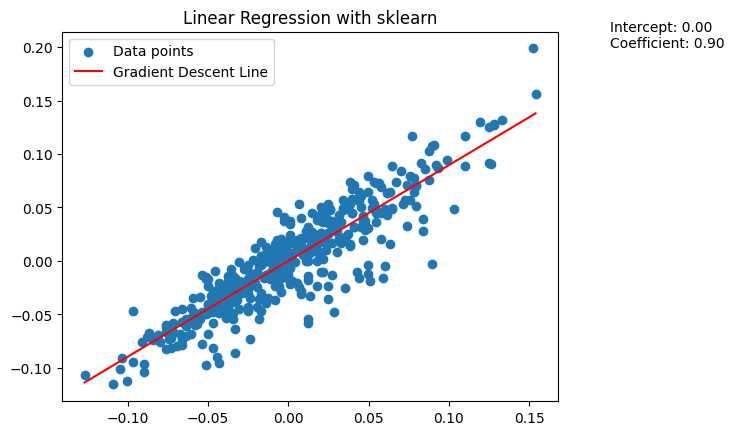

In [139]:
import pandas as pd
# linear regression with sklearn
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y.values)

coeff = model.coef_
intercept = model.intercept_


plot_linear_regression(x, y, intercept, coeff[0], title='Linear Regression with sklearn')

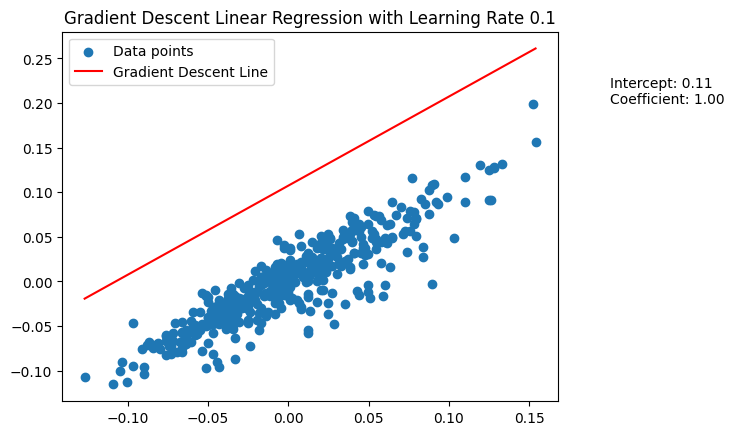

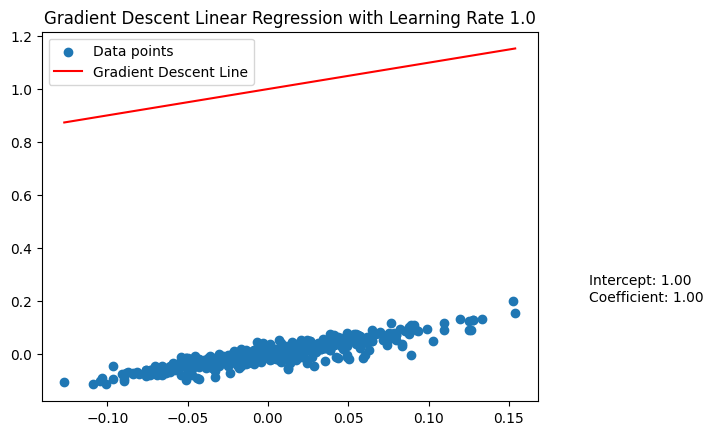

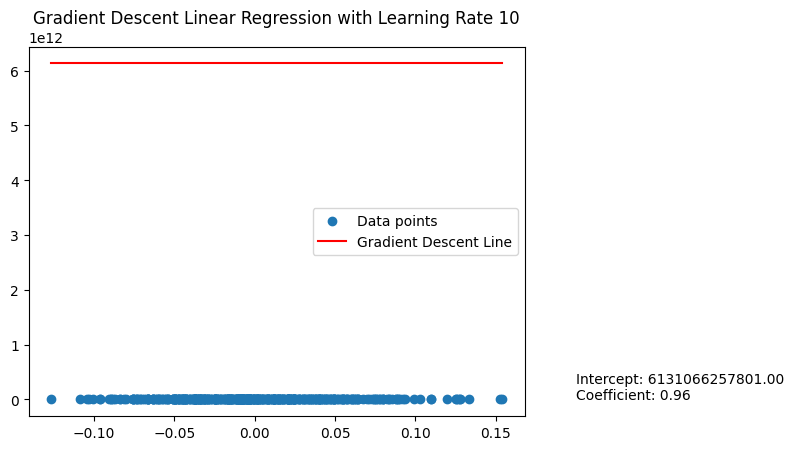

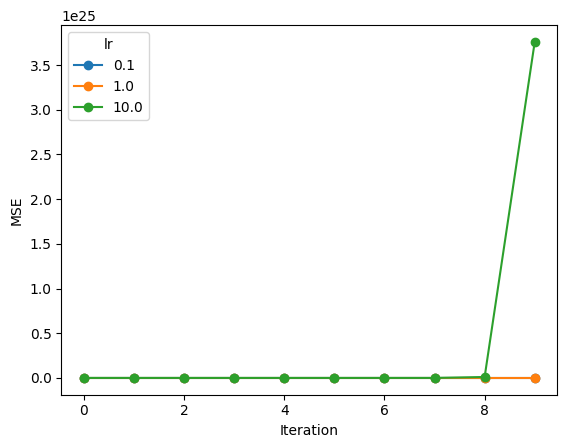

In [161]:
# y_hat = a_0 + a_1 * x





def train(x, y, iterations, lr):
	a_0 = 1
	a_1 = 1
	mses = []
	for i in range(iterations):
		y_hat = a_0 + a_1 * x
		a_0 = a_0 - lr * ( -(2/len(y)) * (y - y_hat).sum() )
		a_1 = a_1 - lr * ( -(2/len(y)) * (x * (y - y_hat)).sum() )

		y_hat_new = a_0 + a_1 * x
		mse = ((y - y_hat_new) ** 2).mean()
		mses.append({
			"iteration": i,
			"mse": mse,
			"lr": lr,
		})
	return a_0, a_1, mses

a_0, a_1, mses_1 = train(x, y, iterations=10, lr=0.1)
plot_linear_regression(x, y, a_0, a_1, title='Gradient Descent Linear Regression with Learning Rate 0.1')

a_0, a_1, mses_2 = train(x, y, iterations=10, lr=1.0)
plot_linear_regression(x, y, a_0, a_1, title='Gradient Descent Linear Regression with Learning Rate 1.0')

a_0, a_1, mses_3 = train(x, y, iterations=10, lr=10)
plot_linear_regression(x, y, a_0, a_1, title='Gradient Descent Linear Regression with Learning Rate 10')


df_mses = pd.DataFrame(mses_1 + mses_2 + mses_3)



labels=[]
for k,v in df_mses.groupby("lr"):
	plt.plot(v["iteration"],v["mse"],marker='o')
	labels.append(k)
	plt.legend(labels,title='lr')
	plt.xlabel('Iteration')
	plt.ylabel('MSE')
